# Loan Approval Prediction using Machine Learning

## Project Overview
This project aims to develop a Machine Learning model that predicts whether a bank should approve a loan application or not. Loan approval is a crucial process for financial institutions to reduce risks and improve decision-making.  

Using different ML algorithms, we compare performance and identify the best model for accurate prediction.
## Objective
To analyze the loan application dataset using Exploratory Data Analysis (EDA)
To preprocess and convert categorical data into numerical form
- To build ML models such as:
Logistic Regression
K-Nearest Neighbors (KNN)
Support Vector Machine (SVM)
Decision Tree
Random Forest
Voting Classifier (Ensemble)
To evaluate model performance using Accuracy, Confusion Matrix, Classification Report & ROC-AUC Curve
To determine the most suitable model for real-world loan approval systems

## Problem Statement
Given customer financial details and demographic data, predict whether loan application status = Approved (1) or Rejected (0).

## Dataset Description
The dataset includes information like:
Gender
Marital Status
Applicant Income
Credit History
Loan Amount
Property Area
Loan Status (Target)

Dataset Source: Public loan approval dataset for Machine Learning research  
## Business Use & Importance
Automating loan approval helps banks:
Reduce manual decision-making  
Detect high-risk borrowers  
Increase customer satisfaction  
Improve financial performance  

## Machine Learning Task
Supervised Learning → Classification Problem

Target Variable → `Loan_Status`  
Prediction Output → 0 (Loan Approved) / 1 (Loan Not Approved)

## Tools & Libraries Used
Python
Pandas, NumPy
Matplotlib, Seaborn
Scikit-Learn


Kaggle Data Set Link: https://www.kaggle.com/datasets/ninzaami/loan-predication

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [31]:
data=pd.read_csv('D:/archive/train_u6lujuX_CVtuZ9i (1).csv')

In [32]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:

data.shape

(614, 13)

In [8]:

data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
print(data.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [11]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
fill_ffill = ['Gender','Married','Dependents','Self_Employed','Credit_History']
for col in fill_ffill:
    data[col] = data[col].fillna(method='ffill')

fill_mean = ['LoanAmount','Loan_Amount_Term']
for col in fill_mean:
    data[col] = data[col].fillna(data[col].mean())


C:\Users\kamal\AppData\Local\Temp\ipykernel_19156\4278189831.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[col] = data[col].fillna(method='ffill')


In [13]:
data = data.drop(columns=['Loan_ID'])


In [14]:
le = LabelEncoder()
cat_cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

for col in cat_cols:
    data[col] = le.fit_transform(data[col])


In [15]:
scaler = StandardScaler()
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
data[num_cols] = scaler.fit_transform(data[num_cols])


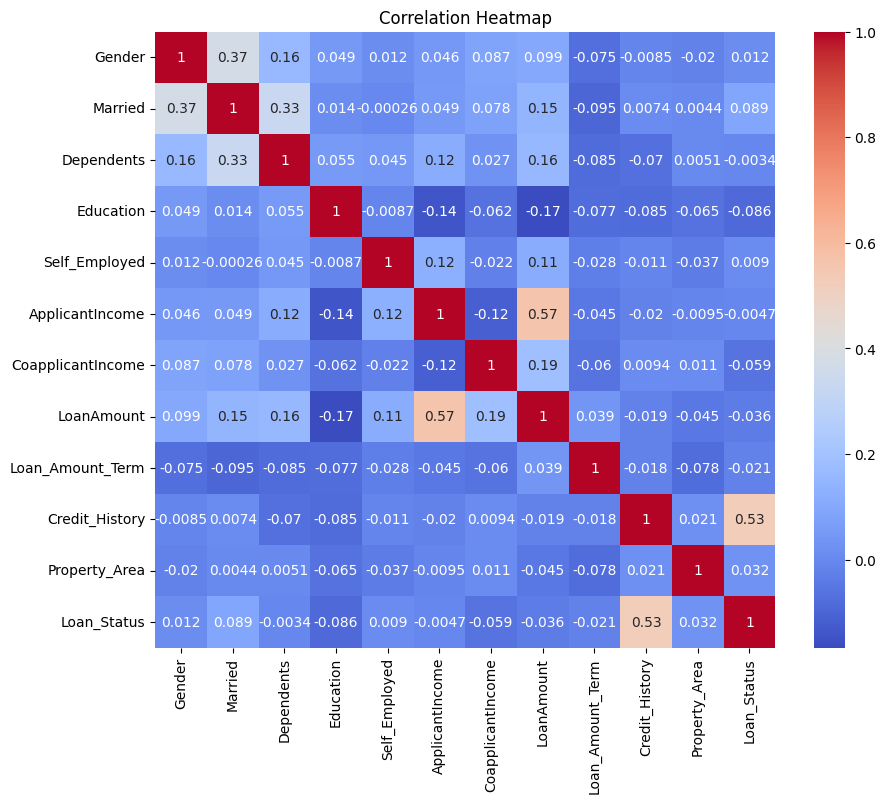

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


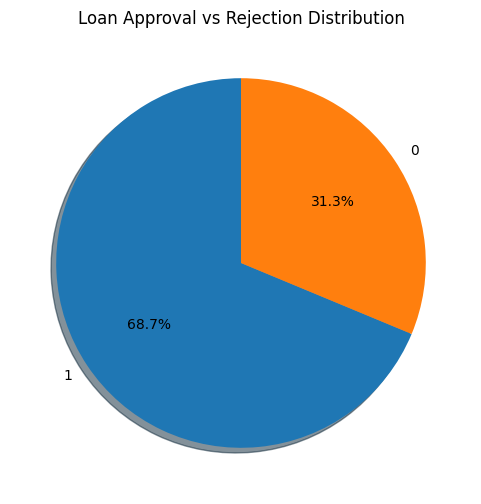

In [17]:
plt.figure(figsize=(6,6))
data['Loan_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Loan Approval vs Rejection Distribution")
plt.ylabel("")
plt.show()


In [18]:
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


Logistic Regression Accuracy: 0.8130081300813008
[[21 22]
 [ 1 79]]
              precision    recall  f1-score   support

           0       0.95      0.49      0.65        43
           1       0.78      0.99      0.87        80

    accuracy                           0.81       123
   macro avg       0.87      0.74      0.76       123
weighted avg       0.84      0.81      0.79       123

ROC AUC: 0.7549418604651164


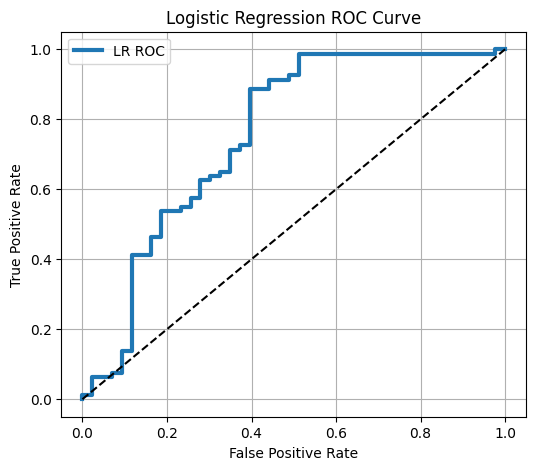

In [19]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
y_proba_lr = lr.predict_proba(x_test)[:,1]

print("Logistic Regression Accuracy:",accuracy_score(y_test,y_pred_lr))
print(confusion_matrix(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))
print("ROC AUC:",roc_auc_score(y_test,y_proba_lr))

fpr,tpr,_ = roc_curve(y_test,y_proba_lr)
plt.figure(figsize=(6,5))
plt.plot(fpr,tpr,label='LR ROC',linewidth=3)
plt.plot([0,1],[0,1],'k--')
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


In this Loan Prediction problem, the target variable is imbalanced.
Here, 0 means Bank will give loan and 1 means Bank will not give loan.

For evaluating a classifier in such business applications:
Precision should be high → so that customers who are eligible for loan are not wrongly rejected.
Recall should also be high → so that risky customers are correctly identified.
F1-score is used to maintain a balance between Precision and Recall when class distribution is uneven.

Also, ROC-AUC score and curve help us check how well the model can distinguish between the two classes at different thresholds.
AUC closer to 1 indicates an excellent model.


 SVM Accuracy: 0.7967479674796748
[[21 22]
 [ 3 77]]
              precision    recall  f1-score   support

           0       0.88      0.49      0.63        43
           1       0.78      0.96      0.86        80

    accuracy                           0.80       123
   macro avg       0.83      0.73      0.74       123
weighted avg       0.81      0.80      0.78       123

ROC AUC: 0.7601744186046511


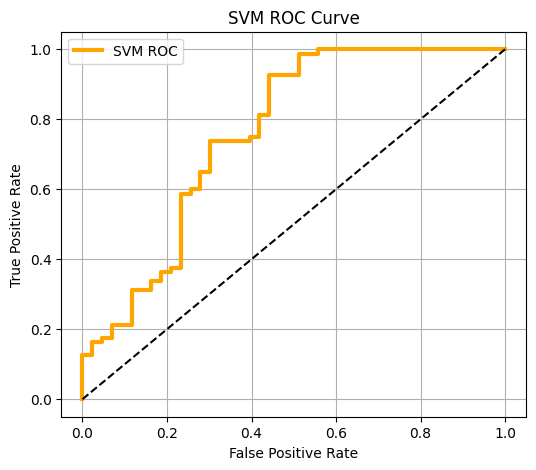

In [21]:
svm_model = SVC(C=10, probability=True)
svm_model.fit(x_train,y_train)

y_pred_svm = svm_model.predict(x_test)
y_proba_svm = svm_model.predict_proba(x_test)[:,1]

print(" SVM Accuracy:",accuracy_score(y_test,y_pred_svm))
print(confusion_matrix(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))
print("ROC AUC:",roc_auc_score(y_test,y_proba_svm))

fpr,tpr,_ = roc_curve(y_test,y_proba_svm)
plt.figure(figsize=(6,5))
plt.plot(fpr,tpr,label='SVM ROC',linewidth=3, color='orange')
plt.plot([0,1],[0,1],'k--')
plt.title('SVM ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


Model Selection Approach:

Logistic Regression is used for linear classification problems where data points can be separated by a straight decision boundary with less overlap. 

On the other hand, algorithms like KNN, Decision Tree, Random Forest, and XGBoost work better for non-linear problems where classes overlap. Decision Tree and Random Forest take more time to train compared to KNN, but they handle complex patterns more effectively.

So, we apply multiple models including Logistic Regression, KNN, Decision Tree, Random Forest, and Voting Classifier to check which one gives the best performance for Loan Prediction.


 Random Forest Accuracy = 0.8130081300813008
Confusion Matrix:
 [[21 22]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.49      0.65        43
           1       0.78      0.99      0.87        80

    accuracy                           0.81       123
   macro avg       0.87      0.74      0.76       123
weighted avg       0.84      0.81      0.79       123

ROC AUC Score = 0.758139534883721


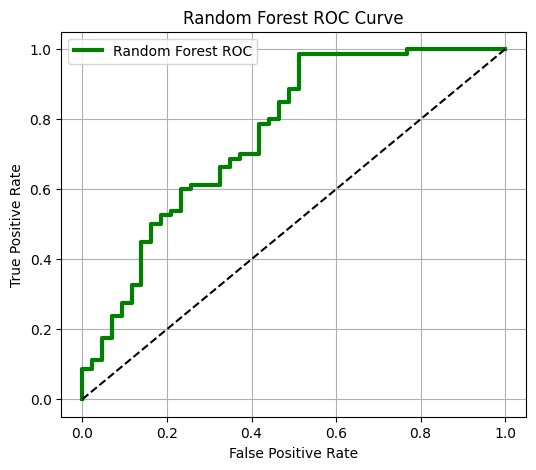

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

#  Random Forest Model Training
ran = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=5,
    max_features=2,
    random_state=42
)
ran.fit(x_train, y_train)

# Predictions
y_pred_rf = ran.predict(x_test)
y_proba_rf = ran.predict_proba(x_test)[:, 1]

# Model Evaluation
print(" Random Forest Accuracy =", accuracy_score(y_test, y_pred_rf))
print("="*50)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("="*50)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("="*50)
print("ROC AUC Score =", roc_auc_score(y_test, y_proba_rf))

# ROC Curve Plot
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6,5))
plt.plot(fpr_rf, tpr_rf, label='Random Forest ROC', linewidth=3, color='green')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.grid()
plt.show()


 KNN Model Accuracy = 0.7235772357723578
Confusion Matrix:
 [[14 29]
 [ 5 75]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.33      0.45        43
           1       0.72      0.94      0.82        80

    accuracy                           0.72       123
   macro avg       0.73      0.63      0.63       123
weighted avg       0.73      0.72      0.69       123

ROC AUC Score = 0.7126453488372093


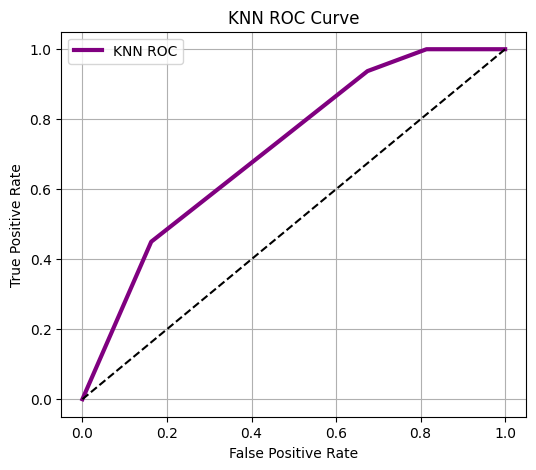

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Training KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

#  Predictions
y_pred_knn = knn.predict(x_test)

#  For ROC curve need probabilities
y_proba_knn = knn.predict_proba(x_test)[:, 1]

#  Evaluation
print(" KNN Model Accuracy =", accuracy_score(y_test, y_pred_knn))
print("="*40)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("="*40)
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("="*40)
print("ROC AUC Score =", roc_auc_score(y_test, y_proba_knn))

#  ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
plt.figure(figsize=(6,5))
plt.plot(fpr_knn, tpr_knn, label='KNN ROC', linewidth=3, color='purple')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend()
plt.grid()
plt.show()


AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. An excellent model has AUC near to the 1 which means it has good measure of separability

In [24]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Define Models
lr = LogisticRegression(max_iter=200, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(max_depth=5, max_features=2, random_state=42)

models = [
    ('Logistic Regression', lr),
    ('K Nearest Neighbour', knn),
    ('Decision Tree', dt)
]

print(" Individual Model Performance:\n")
for name, model in models:
    model.fit(x_train, y_train)
    y_pred_model = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred_model)
    print(f"{name:25} ➤ Accuracy : {acc:.4f}")


 Individual Model Performance:

Logistic Regression       ➤ Accuracy : 0.8130
K Nearest Neighbour       ➤ Accuracy : 0.7236
Decision Tree             ➤ Accuracy : 0.8130


Ensemble Model : Voting Classifier
Accuracy = 0.813
Confusion Matrix:
 [[21 22]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.49      0.65        43
           1       0.78      0.99      0.87        80

    accuracy                           0.81       123
   macro avg       0.87      0.74      0.76       123
weighted avg       0.84      0.81      0.79       123

ROC AUC Score: 0.7825581395348837


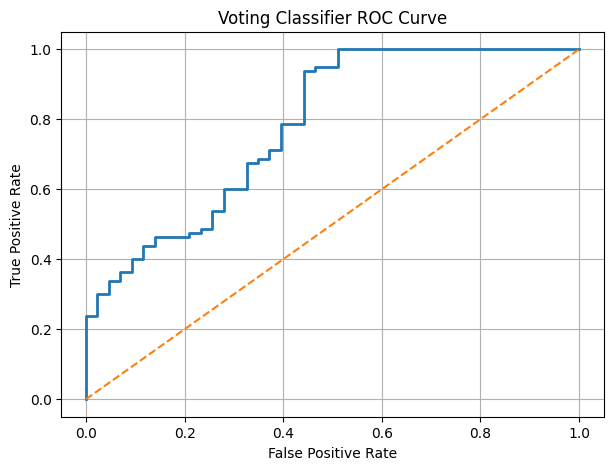

In [25]:


from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score

# Voting Classifier using earlier defined models
VC = VotingClassifier(estimators=models, voting='soft')
VC.fit(x_train, y_train)

# Predictions
y_pred_vc = VC.predict(x_test)
y_proba_vc = VC.predict_proba(x_test)[:, 1]

# Performance Metrics
acc = accuracy_score(y_test, y_pred_vc)
print("Ensemble Model : Voting Classifier")
print("Accuracy =", round(acc, 4))
print("="*50)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_vc))
print("="*50)
print("Classification Report:\n", classification_report(y_test, y_pred_vc))
print("="*50)
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_vc))

# ROC Curve
fpr_vc, tpr_vc, _ = roc_curve(y_test, y_proba_vc)
plt.figure(figsize=(7,5))
plt.plot(fpr_vc, tpr_vc, linewidth=2)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Voting Classifier ROC Curve")
plt.grid(True)
plt.show()


 SVM Accuracy = 0.7967479674796748
Confusion Matrix:
 [[21 22]
 [ 3 77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.49      0.63        43
           1       0.78      0.96      0.86        80

    accuracy                           0.80       123
   macro avg       0.83      0.73      0.74       123
weighted avg       0.81      0.80      0.78       123

SVM ROC AUC Score = 0.7601744186046511


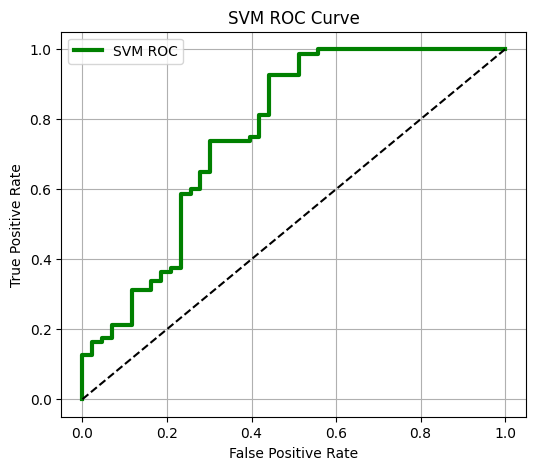

In [30]:

from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=10, probability=True, random_state=42)
svm_model.fit(x_train, y_train)

# Predictions & Probabilities
y_pred_svm = svm_model.predict(x_test)
y_proba_svm = svm_model.predict_proba(x_test)[:, 1]

# Evaluation
print(" SVM Accuracy =", accuracy_score(y_test, y_pred_svm))
print("="*40)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("="*40)
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("="*40)
print("SVM ROC AUC Score =", roc_auc_score(y_test, y_proba_svm))

# ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
plt.figure(figsize=(6,5))
plt.plot(fpr_svm, tpr_svm, label='SVM ROC', linewidth=3, color='green')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve")
plt.legend()
plt.grid()
plt.show()


In [28]:
# Decision Tree Prediction Store
y_pred_dt = dt.predict(x_test)
y_proba_dt = dt.predict_proba(x_test)[:,1]


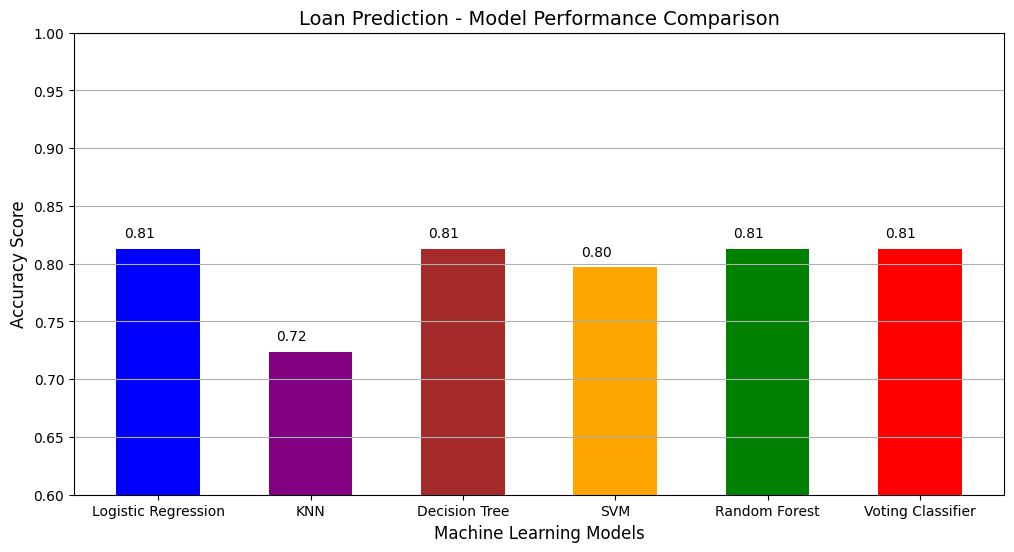

In [29]:


models_name = [
    "Logistic Regression",
    "KNN",
    "Decision Tree",
    "SVM",
    "Random Forest",
    "Voting Classifier"
]

accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_vc),
]

plt.figure(figsize=(12,6))
bars = plt.bar(models_name, accuracies, width=0.55,
               color=['blue','purple','brown','orange','green','red'])

plt.ylim(0.6,1)
plt.xlabel("Machine Learning Models", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)
plt.title("Loan Prediction - Model Performance Comparison", fontsize=14)
plt.grid(axis='y')

# Display accuracy above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.05, yval + 0.01, f"{yval:.2f}", fontsize=10)

plt.show()
